首先，统计句子词数分布

In [ ]:
import random
from datasets import load_from_disk
import jieba

DATA_PATH = "**YOUR_DATA_PATH**"
dataset = load_from_disk(DATA_PATH)
punctuations = [",",".","?","!","，","。","！","？"]
think_punctuations = ["嗯...","那个...","这个...","呃...","啊...","哦...","唔..."]
end_no_punc_data = []
end_mid_filler_data = []
unend_mid_filler_data = []
unend_end_filler_data = []
unend_both_filler_data = []

sets = {}
for dt in dataset:
    words = list(jieba.cut(dt['text']))
    sets[len(words)] = sets.get(len(words), 0) + 1

/opt/conda/envs/xkenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/envs/xkenv/lib/python3.12/site-packages/jieba/_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.604 seconds.
Prefix dict has been built successfully.


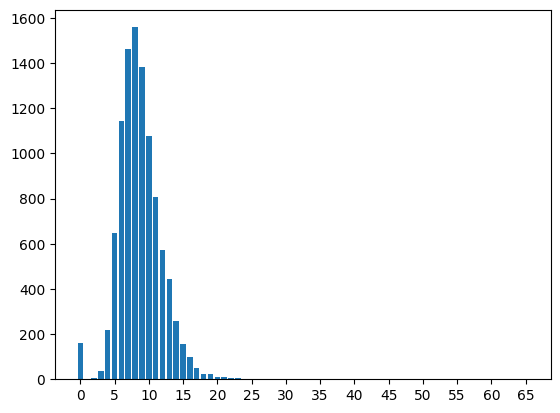

In [ ]:
import matplotlib.pyplot as plt

plt.bar(sets.keys(), sets.values())
# 设置key间隔为5
plt.xticks(range(0, max(sets.keys())+1, 5))
plt.xlabel('句子词数')
plt.ylabel('句子数量')
plt.title('完整句子词数分布')
plt.show()

使用jieba判断词的数量

In [5]:
def segment_sentence(sentence):
    words = list(jieba.cut(sentence))
    if len(words) <= 4:
        return sentence
    start_loc = len(words)//2
    end_loc = len(words)*3//4
    cut_loc = random.randint(start_loc, end_loc)
    if sentence[cut_loc-1] in punctuations:
        return sentence
    else:
        return "".join(words[:cut_loc])
    
cut_sets = {}
for item in dataset:
    cut_sentence = segment_sentence(item['text'])
    words = list(jieba.cut(cut_sentence))
    cut_sets[len(words)] = cut_sets.get(len(words), 0) + 1

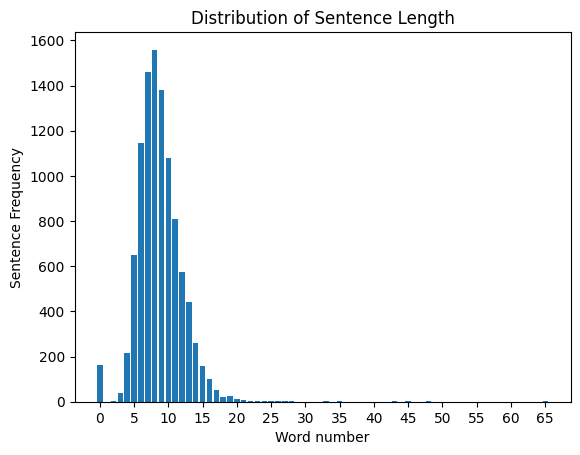

In [7]:
# 绘图
plt.bar(sets.keys(), sets.values())
# 设置key间隔为5
plt.xticks(range(0, max(sets.keys())+1, 5))
plt.xlabel('Word number')
plt.ylabel('Sentence Frequency')
plt.title('Distribution of Sentence Length')
plt.show()